In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack

In [42]:
N_samples = 2000  # number of samples
time = 365.0  # days
t = np.linspace(0.0,time,num=N_samples)
dt = time/N_samples

print("dt:",dt,"days")

dt: 0.1825 days


In [55]:
twopi = 2.0*np.pi

amplitude = 1.0*np.sin(t*twopi/81+0.8*twopi) + 2.5*np.cos(t*twopi/13+0.2*twopi) \
+ 1.5*np.sin(t*twopi/50) + 0.0*(np.random.rand(t.size)-0.5) + 3.0*np.sin(t*twopi/500.0 + 0.3*twopi)

amplitude_noisy = 1.0*np.sin(t*twopi/81+0.8*twopi) + 2.5*np.cos(t*twopi/13+0.2*twopi) \
+ 1.5*np.sin(t*twopi/50) + 8.0*(np.random.rand(t.size)-0.5) + 3.0*np.sin(t*twopi/500.0 + 0.3*twopi)

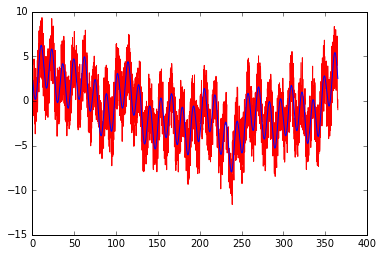

In [59]:
plt.plot(t,amplitude_noisy,'r-')
plt.plot(t,amplitude,'b-')


/Users/bwoshea/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bwoshea/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bwoshea/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide


(0, 0.25)

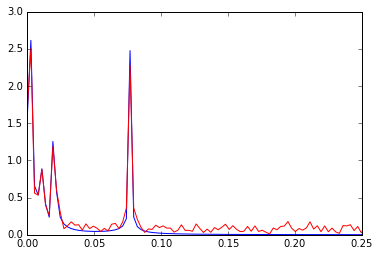

In [64]:
yf = scipy.fftpack.fft(amplitude)

yf_noisy = scipy.fftpack.fft(amplitude_noisy)

xf = np.linspace(0.0,1.0/(2.0*dt), N_samples/2)

amp_at_freq = 2.0/N_samples * np.abs(yf[0:N_samples/2])
amp_at_freq_noisy = 2.0/N_samples * np.abs(yf_noisy[0:N_samples/2])

period = 1.0/xf

plt.plot(xf, amp_at_freq,'b-')
plt.plot(xf, amp_at_freq_noisy,'r-')

plt.xlim(0,.25)

In [54]:
twopi/500

0.012566370614359173

In [74]:
np.savetxt("time_varying_object.txt",np.c_[t,amplitude_noisy],fmt="%.6e",header="time [days]    flux [arb. units]")